<a href="https://colab.research.google.com/github/slimf1/ZZ3-DL/blob/main/04_autoencoder_CNN_Keras_etud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencodeur 

Objectif : construire un autoencodeur à deux couches en utilisant Keras :
- l'encodeur compresse l'information dans l'espace latent
- le décodeur reconstruit l'image

## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)


# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.




11501568/11490434 [==============================] - 0s 0us/step


## Autoencodeur à couches convolutives


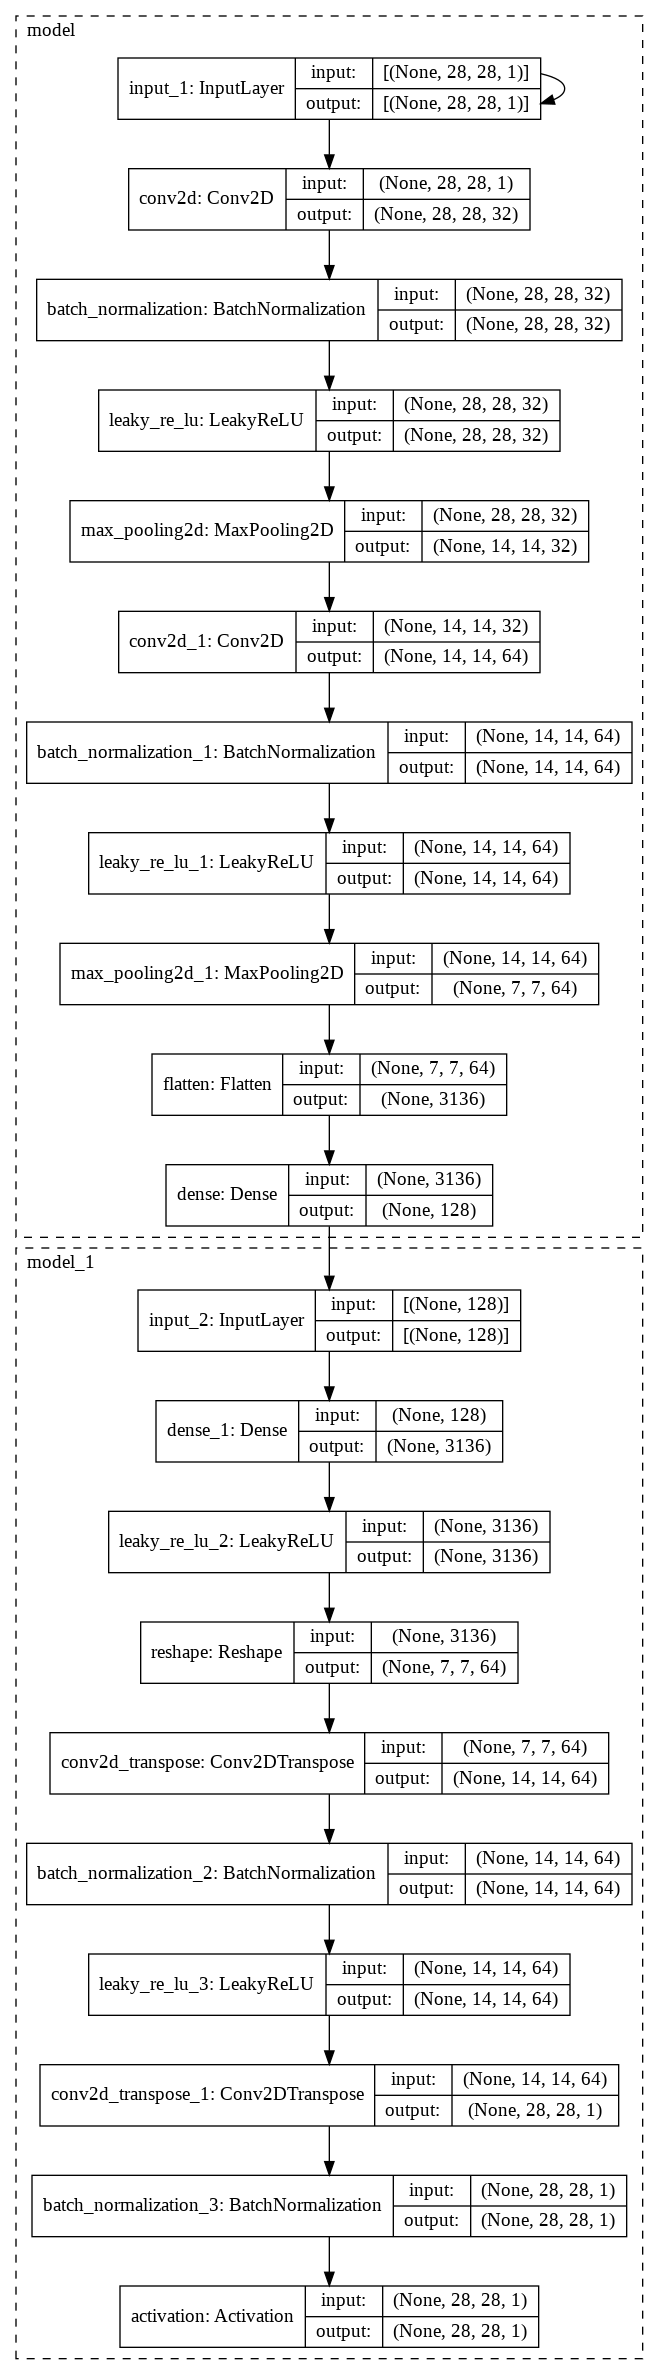

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Input,Conv2D,MaxPool2D,Dense,BatchNormalization,LeakyReLU,Flatten, Reshape,Conv2DTranspose
from tensorflow.keras.utils import plot_model

dim_latent = 128
batch_size=256

# Encodeur
input_encoder = Input(shape=(28, 28, 1))
x = Conv2D(32, kernel_size=(1, 1), activation="relu")(input_encoder)
x = BatchNormalization(momentum=0.5)(x)
x = LeakyReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(1, 1), activation='relu')(x)
x = BatchNormalization(momentum=0.5)(x)
x = LeakyReLU()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(dim_latent, activation='linear')(x)
encoder = Model(input_encoder, x)

# Decodeur 
input_decoder = Input(shape=(dim_latent, ))
y = Dense(3136, activation='relu')(input_decoder) # ou cf. pmc
y = LeakyReLU()(y)
y = Reshape(target_shape=(7, 7, 64))(y) # 5, 5
y = Conv2DTranspose(filters=64, activation="relu", padding="same", strides=2, kernel_size=(5, 5))(y)
y = BatchNormalization()(y)
y = LeakyReLU()(y) # 5, 5
y = Conv2DTranspose(filters=1, activation="relu", padding="same", strides=2, kernel_size=(5, 5))(y)
y = BatchNormalization()(y)
y = Activation("sigmoid")(y)

decoder = Model(input_decoder, y)

# AE
full = decoder(encoder(input_encoder))
model = Model(input_encoder, full)
#TODO

plot_model(model, show_shapes=True, expand_nested=True)


In [4]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 128)               404096    
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         508869    
Total params: 912,965
Trainable params: 912,643
Non-trainable params: 322
_________________________________________________________________


Epoch 1/20
235/235 [==============================] - 39s 37ms/step - loss: 0.4888 - acc: 0.7798 - val_loss: 0.4390 - val_acc: 0.7929
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3846 - acc: 0.8048 - val_loss: 0.3862 - val_acc: 0.7959

Epoch 0 Précision :0.805 


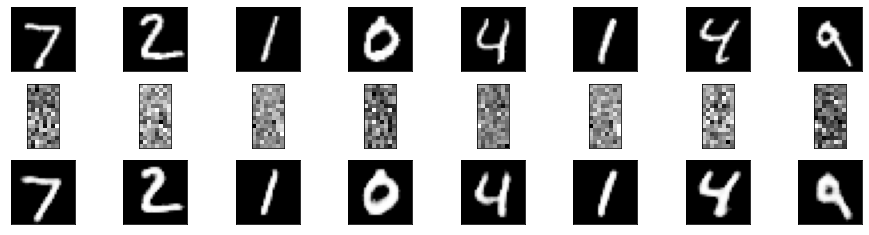

Epoch 3/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3228 - acc: 0.8080 - val_loss: 0.3226 - val_acc: 0.8039
Epoch 4/20
235/235 [==============================] - 8s 35ms/step - loss: 0.2746 - acc: 0.8104 - val_loss: 0.2587 - val_acc: 0.8097
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2379 - acc: 0.8119 - val_loss: 0.2307 - val_acc: 0.8101
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2107 - acc: 0.8126 - val_loss: 0.1978 - val_acc: 0.8121
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1896 - acc: 0.8131 - val_loss: 0.1842 - val_acc: 0.8117

Epoch 5 Précision :0.813 


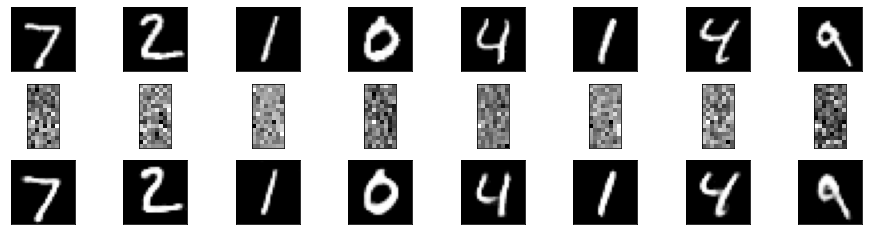

Epoch 8/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1727 - acc: 0.8134 - val_loss: 0.1677 - val_acc: 0.8122
Epoch 9/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1591 - acc: 0.8137 - val_loss: 0.1610 - val_acc: 0.8117
Epoch 10/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1480 - acc: 0.8139 - val_loss: 0.1442 - val_acc: 0.8128
Epoch 11/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1390 - acc: 0.8140 - val_loss: 0.1380 - val_acc: 0.8126
Epoch 12/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1313 - acc: 0.8141 - val_loss: 0.1393 - val_acc: 0.8120

Epoch 10 Précision :0.814 


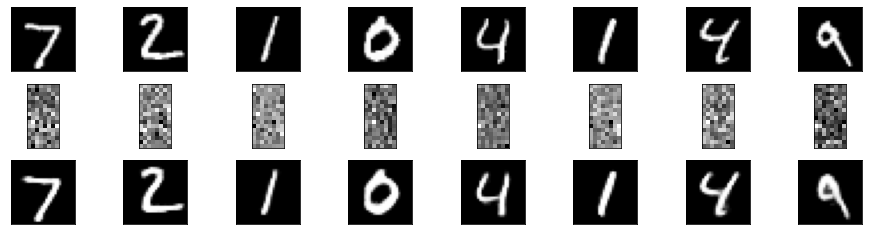

Epoch 13/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1248 - acc: 0.8142 - val_loss: 0.1259 - val_acc: 0.8125
Epoch 14/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1192 - acc: 0.8143 - val_loss: 0.1186 - val_acc: 0.8130
Epoch 15/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1144 - acc: 0.8144 - val_loss: 0.1163 - val_acc: 0.8128
Epoch 16/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1101 - acc: 0.8145 - val_loss: 0.1110 - val_acc: 0.8131
Epoch 17/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1064 - acc: 0.8145 - val_loss: 0.1079 - val_acc: 0.8130

Epoch 15 Précision :0.815 


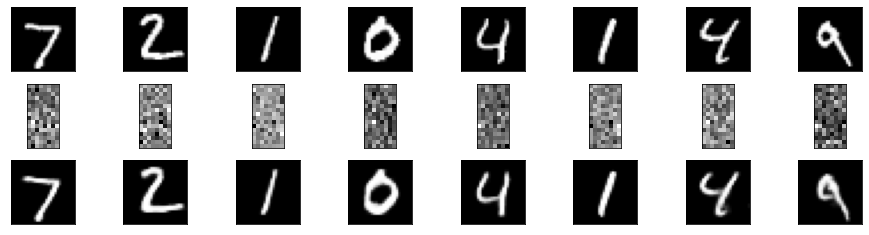

Epoch 18/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1032 - acc: 0.8145 - val_loss: 0.1042 - val_acc: 0.8133
Epoch 19/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1004 - acc: 0.8146 - val_loss: 0.1041 - val_acc: 0.8129
Epoch 20/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0978 - acc: 0.8146 - val_loss: 0.1022 - val_acc: 0.8128


In [5]:
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((epoch-1) % 5==0):   
            print("\nEpoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(16,8))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()
model.fit(x_train,x_train,epochs=20,batch_size=batch_size,validation_data=(x_test, x_test),callbacks=[callbacks])